In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# function which given a np array of discharge returns array of non-exceedance probabilities
def non_exceedance_probabilities(discharge):
    # sort the discharge
    discharge = np.sort(discharge)
    # calculate the non-exceedance probabilities
    non_exceedance_probabilities = np.arange(1, discharge.size+1) / discharge.size
    return non_exceedance_probabilities

In [ ]:
#function which given a non-exceedance probability returns the discharge, using interpolation
def discharge_from_non_exceedance_probability(non_exceedance_probability, discharge, non_exceedance_probabilities):
    # interpolate the discharge
    discharge = np.interp(non_exceedance_probability, non_exceedance_probabilities, discharge)
    return discharge

C:\Users\Kushagra\AppData\Local\Temp\ipykernel_10424\2663052432.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('./data/Bhadra Haralahalli.csv', header=0, names=['Date', 'Discharge'], parse_dates=['Date'])


Text(0, 0.5, 'Non Exceedance Probability')

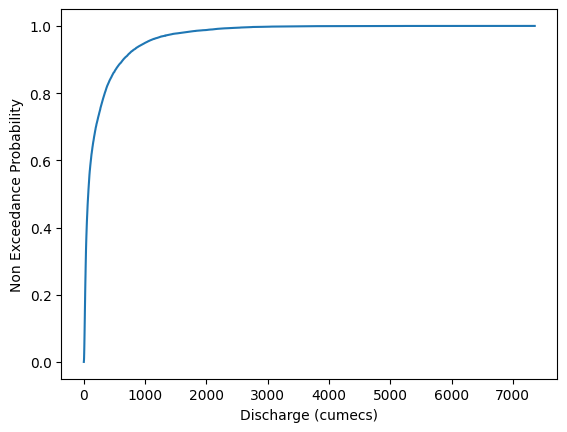

In [74]:
# Read data from csv file, data has 2 columns: Date and Discharge(cumsecs)
df = pd.read_csv('./data/Bhadra Haralahalli.csv', header=0, names=['Date', 'Discharge'], parse_dates=['Date'])

# Clean up discharge column
df = df.dropna()
df = df[df.Discharge != "0"]
df.Discharge = df.Discharge.str.replace(',', '')
df.Discharge = df.Discharge.str.replace('"', '')
discharge = df.Discharge.values.astype(float)

# Plot Non Exceedance Probability vs Discharge
discharge = np.sort(discharge)
prob = non_exceedance_probabilities(discharge)
plt.plot(discharge, prob)
plt.xlabel('Discharge (cumecs)')
plt.ylabel('Non Exceedance Probability')